<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

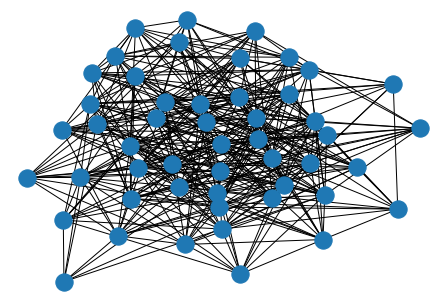

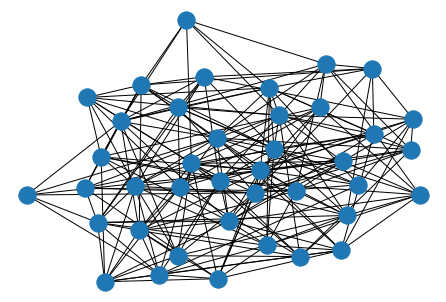

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities
T  = K/5 #Number of test available
PAS = 0.7 #Probability of Asymptomatic
PS = 1 - PAS #Probability of Not Asymptomatic


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
    Node[i*NN+j].append({'ISOLATED_S' : 0})
    Node[i*NN+j].append({'ISOLATED_I' : 0})   
print(Node)
print(len(Node))


{0: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 1: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 2: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 3: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 5: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 6: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 7: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 8: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOL

In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1

  Symptom = random.choices([0,1],weights=(PAS,PS), k=1)[0]
  Isolate = 0

  Agent[k].append({'Symptom' : Symptom, 'Isolate' : Isolate})
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom,Isolate]})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom,Isolate], 'C' : 0})
    Agent[k].append({'State' : Rand_state, 'C' : 0 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state]})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
print(Agent)

{0: [{'Viral_load': 0}, {'S': 3}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {7473: [0, 0, 0]}, {8108: [0, 0, 0]}, {9159: [0, 0, 0]}], 1: [{'Viral_load': 0}, {'S': 6}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {2184: [0, 0, 0]}, {2466: [0, 0, 0]}, {3103: [0, 1, 0]}, {6063: [0, 0, 0]}, {7508: [0, 0, 0]}, {8004: [0, 1, 0]}], 2: [{'Viral_load': 0}, {'S': 6}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {241: [0, 0, 0]}, {3223: [0, 0, 0]}, {5074: [0, 0, 0]}, {8638: [0, 1, 0]}, {8830: [0, 0, 0]}, {8981: [0, 0, 0]}], 3: [{'Viral_load': 0}, {'S': 6}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {426: [0, 0, 0]}, {1858: [0, 1, 0]}, {4170: [0, 0, 0]}, {4278: [0, 0, 0]}, {5189: [0, 0, 0]}, {5474: [0, 0, 0]}], 4: [{'Viral_load': 0}, {'S': 12}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {701: [0, 0, 0]}, {915: [0, 1, 0]}, {2693: [0, 0, 0]}, {5842: [0, 1, 0]}, {6887: [0, 1, 0]}, {6973: [0, 1, 0]}, {7458: [0, 0, 0]}, {7630: [0, 

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED_S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED_I' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(6,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][2]['Home_node'])
                  neighbors.append(Agent_next[a_id][4]['First_node'])
                  neighbors.append(Agent_next[a_id][6]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][5]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][5]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][7]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][7]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][3]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][3]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][5]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][7]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][3]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.95,.025,.025), k=1)[0]
                      if next == Agent_next[a_id][8]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][4]['First_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][4]['First_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][5]['First_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][5]['First_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][5]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][6]['Second_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][6]['Second_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][7]['Second_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][7]['Second_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][7]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][2]['Home_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][2]['Home_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][3]['Home_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][3]['Home_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][3]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = 3*P1
                        P2 = P2
                        P3 = P3
                      elif max(P1,P2,P3) == P2:
                        P1 = 3*P1
                        P2 = 2*P2
                        P3 = P1
                      else:
                        P1 = 3*P1
                        P2 = P2
                        P3 = 2*P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      #nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      nextn = random.choices(Agent_next[a_id][9]['Current_nodeN'],weights=(.90,.05,.05),k=1)[0]                    
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id][0] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id][0] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['C']+=1
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id][0] == 2:
            Node_next[nex][3]['R']+=1

          if Node[cur][agent][a_id][2] == 1:
            if Node[cur][agent][a_id][0] == 0:
              Node_next[nex][4]['ISOLATED_S']+=1
            elif Node[cur][agent][a_id][0] == 1:
              Node_next[nex][5]['ISOLATED_I']+=1

          
          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        Total = Node_next[i*len(GraphN.nodes)+j][1]['S'] - Node_next[i*len(GraphN.nodes)+j][4]['ISOLATED_S'] + Node_next[i*len(GraphN.nodes)+j][2]['I'] - Node_next[i*len(GraphN.nodes)+j][5]['ISOLATED_I'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] + 1
        W1 = (Node_next[i*len(GraphN.nodes)+j][2]['I'] - Node_next[i*len(GraphN.nodes)+j][5]['ISOLATED_I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load'])/Total
        W2 = (Node_next[i*len(GraphN.nodes)+j][1]['S'] - Node_next[i*len(GraphN.nodes)+j][4]['ISOLATED_S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1)/Total
        for agent in list(range(6,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'C' : 0})
              Agent_next[a_id][1]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['C'] == 4:   #Time-steps of 4 to get cured(I -> R)
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
              count_IR+=1
              Agent_next[a_id][1]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  count_ISOLATED_S=0
  count_ISOLATED_I=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    count_ISOLATED_S+=Node[i][4]['ISOLATED_S']
    count_ISOLATED_I+=Node[i][5]['ISOLATED_I']
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,count_ISOLATED_S,count_ISOLATED_I,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][1]['State'] == 0:
      count_S+=1
    elif Agent[i][1]['State'] == 1:
      count_I+=1
    elif Agent[i][1]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9792, 9569, 9190, 8580, 7801, 6789, 5547, 4248, 2903, 1786, 992, 527, 286, 167, 101, 62, 44, 38, 36, 34, 32, 32, 32, 32, 32, 32, 32, 32]
[208, 431, 810, 1420, 1991, 2780, 3643, 4332, 4898, 5003, 4555, 3721, 2617, 1619, 891, 465, 242, 129, 65, 28, 12, 6, 4, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 208, 431, 810, 1420, 2199, 3211, 4453, 5752, 7097, 8214, 9008, 9473, 9714, 9833, 9899, 9938, 9956, 9962, 9964, 9966, 9968, 9968, 9968, 9968]
[0.0, 26.0, 123.0, 295.5, 550.75, 863.375, 1221.6875, 1655.84375, 2064.921875, 2398.4609375, 2575.23046875, 2456.615234375, 2179.3076171875, 1764.65380859375, 1279.326904296875, 837.6634521484375, 532.8317260742188, 332.4158630371094, 205.2079315185547, 117.60396575927734, 67.80198287963867, 37.900991439819336, 20.950495719909668, 10.475247859954834, 6.237623929977417, 3.1188119649887085, 1.5594059824943542, 0.7797029912471771]
[[], [9792, 9569, 9190, 8580, 7801, 6789, 5547, 4248, 2903, 1786, 992, 527, 286, 167, 101, 62, 44, 38, 36, 34, 32, 32, 32, 32, 32, 32, 32, 32

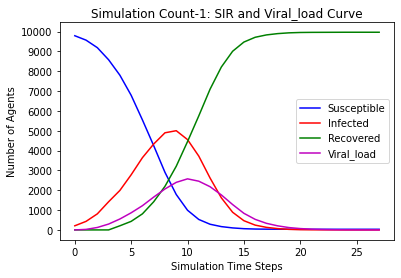

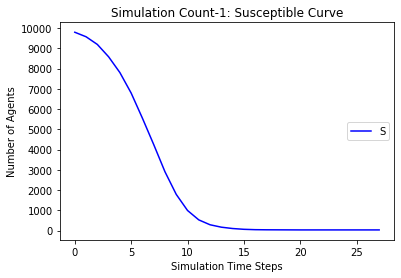

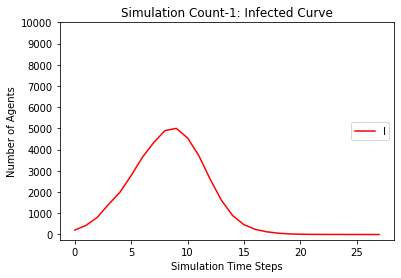

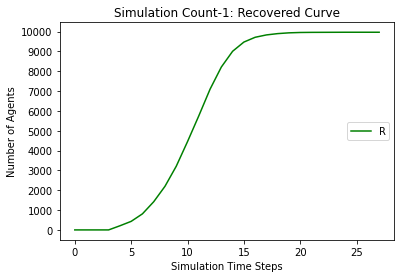

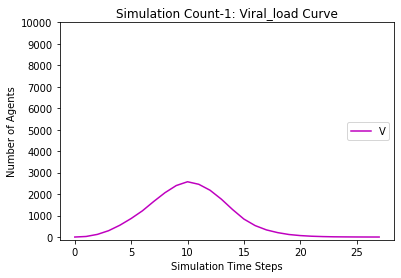

[9792, 9548, 9137, 8506, 7665, 6609, 5336, 3975, 2703, 1610, 876, 466, 255, 144, 100, 80, 67, 54, 48, 35, 30, 28, 28, 28, 28, 28, 28, 28, 28]
[208, 452, 863, 1494, 2127, 2939, 3801, 4531, 4962, 4999, 4460, 3509, 2448, 1466, 776, 386, 188, 90, 52, 45, 37, 26, 20, 7, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 208, 452, 863, 1494, 2335, 3391, 4664, 6025, 7297, 8390, 9124, 9534, 9745, 9856, 9900, 9920, 9933, 9946, 9952, 9965, 9970, 9972, 9972, 9972, 9972]
[0.0, 29.0, 125.5, 291.75, 561.875, 860.9375, 1271.46875, 1733.734375, 2137.8671875, 2471.93359375, 2590.966796875, 2491.4833984375, 2207.74169921875, 1739.870849609375, 1222.9354248046875, 803.4677124023438, 517.7338562011719, 304.86692810058594, 186.43346405029297, 107.21673202514648, 66.60836601257324, 38.30418300628662, 22.15209150314331, 16.076045751571655, 10.038022875785828, 5.019011437892914, 2.509505718946457, 1.2547528594732285, 0.6273764297366142]
[[], [9792, 9569, 9190, 8580, 7801, 6789, 5547, 4248, 2903, 1786, 992, 527, 286, 167, 101, 62, 4

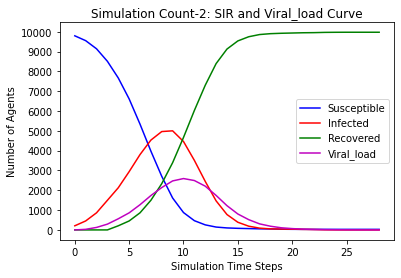

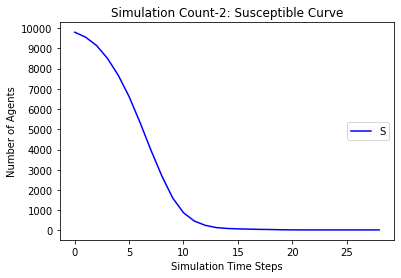

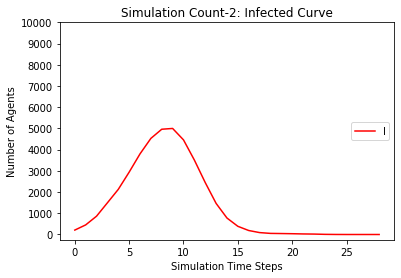

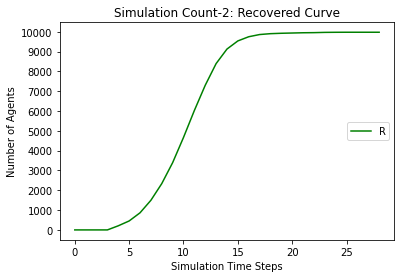

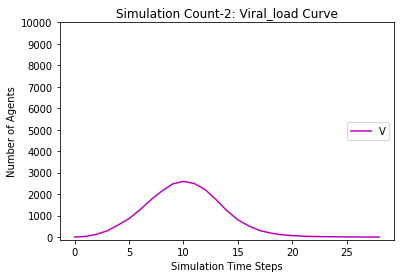

[9792, 9552, 9120, 8514, 7670, 6646, 5398, 4075, 2816, 1765, 1012, 567, 310, 182, 110, 82, 64, 50, 44, 42, 37, 36, 36, 36, 36, 36, 36, 36, 36]
[208, 448, 880, 1486, 2122, 2906, 3722, 4439, 4854, 4881, 4386, 3508, 2506, 1583, 902, 485, 246, 132, 66, 40, 27, 14, 8, 6, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 208, 448, 880, 1486, 2330, 3354, 4602, 5925, 7184, 8235, 8988, 9433, 9690, 9818, 9890, 9918, 9936, 9950, 9956, 9958, 9963, 9964, 9964, 9964, 9964]
[0.0, 27.0, 140.5, 301.25, 553.625, 883.8125, 1237.90625, 1641.953125, 2057.9765625, 2346.98828125, 2525.494140625, 2453.7470703125, 2140.87353515625, 1739.436767578125, 1293.7183837890625, 880.8591918945312, 560.4295959472656, 343.2147979736328, 205.6073989868164, 117.8036994934082, 72.9018497467041, 47.45092487335205, 28.725462436676025, 15.362731218338013, 8.681365609169006, 4.340682804584503, 2.1703414022922516, 1.0851707011461258, 0.5425853505730629]
[[], [9792, 9569, 9190, 8580, 7801, 6789, 5547, 4248, 2903, 1786, 992, 527, 286, 167, 101, 62, 44,

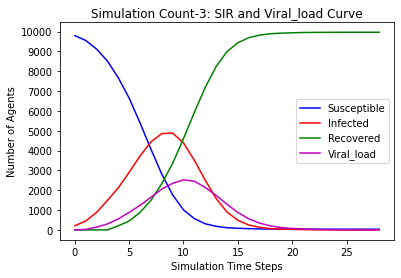

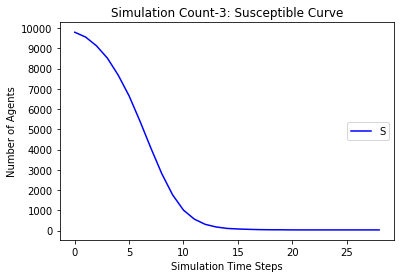

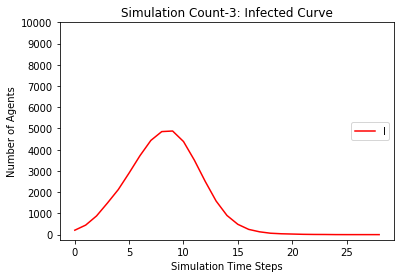

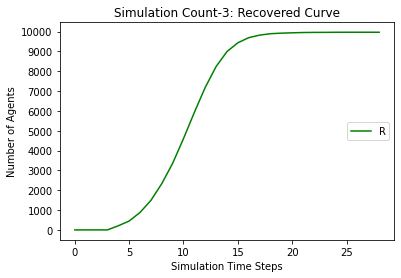

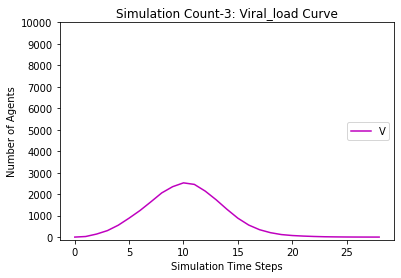

[9792, 9533, 9098, 8454, 7668, 6682, 5434, 4080, 2696, 1643, 905, 492, 270, 151, 96, 62, 41, 35, 33, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30]
[208, 467, 902, 1546, 2124, 2851, 3664, 4374, 4972, 5039, 4529, 3588, 2426, 1492, 809, 430, 229, 116, 63, 31, 10, 4, 2, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 208, 467, 902, 1546, 2332, 3318, 4566, 5920, 7304, 8357, 9095, 9508, 9730, 9849, 9904, 9938, 9959, 9965, 9967, 9969, 9969, 9969, 9969, 9970, 9970]
[0.0, 35.0, 141.5, 331.75, 595.875, 884.9375, 1238.46875, 1647.234375, 2047.6171875, 2381.80859375, 2572.904296875, 2480.4521484375, 2159.22607421875, 1749.613037109375, 1262.8065185546875, 854.4032592773438, 549.2016296386719, 325.60081481933594, 190.80040740966797, 115.40020370483398, 69.70010185241699, 39.850050926208496, 20.925025463104248, 10.462512731552124, 5.231256365776062, 3.615628182888031, 2.8078140914440155, 1.4039070457220078, 0.7019535228610039]
[[], [9792, 9569, 9190, 8580, 7801, 6789, 5547, 4248, 2903, 1786, 992, 527, 286, 167, 101, 62, 4

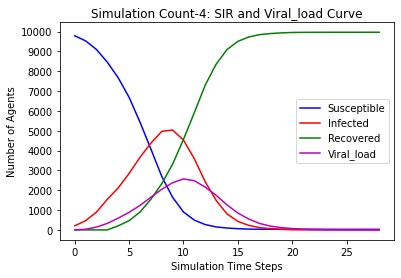

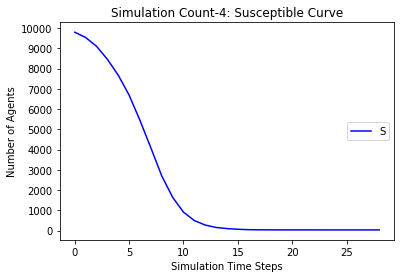

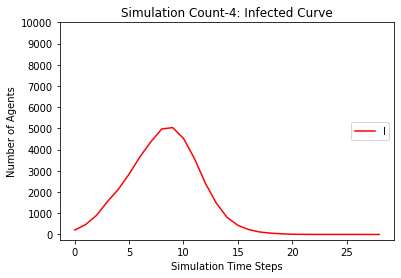

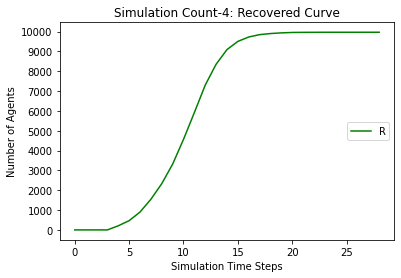

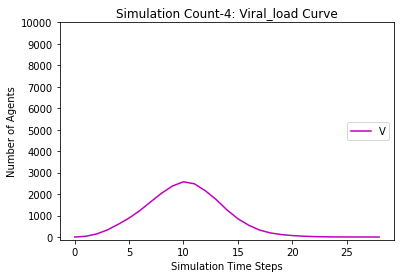

[9792, 9552, 9117, 8491, 7636, 6527, 5235, 3817, 2528, 1489, 850, 456, 243, 153, 102, 67, 42, 39, 32, 30, 29, 27, 27, 27, 27, 26, 25, 25, 25, 25, 25]
[208, 448, 883, 1509, 2156, 3025, 3882, 4674, 5108, 5038, 4385, 3361, 2285, 1336, 748, 389, 201, 114, 70, 37, 13, 12, 5, 3, 2, 1, 2, 2, 2, 1, 0]
[0, 0, 0, 0, 208, 448, 883, 1509, 2364, 3473, 4765, 6183, 7472, 8511, 9150, 9544, 9757, 9847, 9898, 9933, 9958, 9961, 9968, 9970, 9971, 9973, 9973, 9973, 9973, 9974, 9975]
[0.0, 33.0, 141.5, 311.75, 576.875, 912.4375, 1356.21875, 1792.109375, 2195.0546875, 2462.52734375, 2607.263671875, 2456.6318359375, 2105.31591796875, 1654.657958984375, 1169.3289794921875, 794.6644897460938, 491.3322448730469, 290.66612243652344, 175.33306121826172, 107.66653060913086, 59.83326530456543, 33.916632652282715, 19.958316326141357, 12.979158163070679, 8.48957908153534, 4.24478954076767, 3.122394770383835, 1.5611973851919174, 0.7805986925959587, 0.39029934629797935, 0.19514967314898968]
[[], [9792, 9569, 9190, 8580,

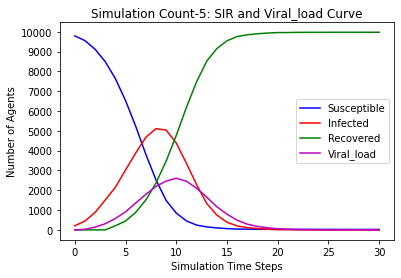

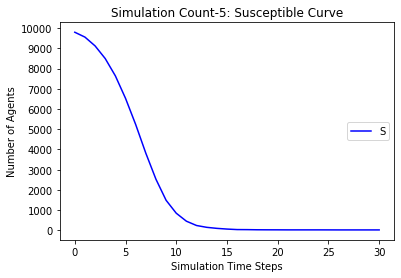

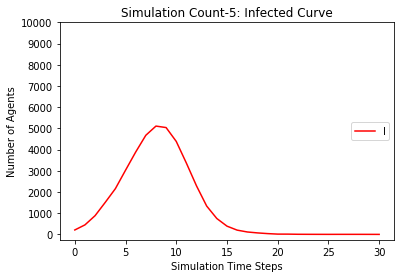

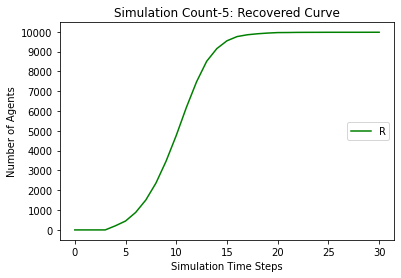

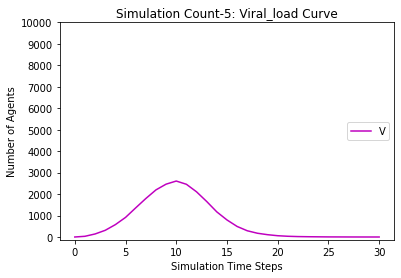

[9792, 9568, 9174, 8618, 7865, 6961, 5832, 4477, 3118, 1941, 1150, 638, 343, 221, 145, 111, 87, 74, 67, 60, 59, 56, 56, 56, 56, 56, 56, 56, 56]
[208, 432, 826, 1382, 1927, 2607, 3342, 4141, 4747, 5020, 4682, 3839, 2775, 1720, 1005, 527, 256, 147, 78, 51, 28, 18, 11, 4, 3, 0, 0, 0, 0]
[0, 0, 0, 0, 208, 432, 826, 1382, 2135, 3039, 4168, 5523, 6882, 8059, 8850, 9362, 9657, 9779, 9855, 9889, 9913, 9926, 9933, 9940, 9941, 9944, 9944, 9944, 9944]
[0.0, 24.0, 119.0, 288.5, 532.25, 791.125, 1150.5625, 1527.28125, 1954.640625, 2288.3203125, 2497.16015625, 2535.580078125, 2318.7900390625, 1878.39501953125, 1381.197509765625, 951.5987548828125, 605.7993774414062, 362.8996887207031, 215.44984436035156, 127.72492218017578, 77.86246109008789, 50.931230545043945, 31.465615272521973, 17.732807636260986, 8.866403818130493, 4.433201909065247, 2.2166009545326233, 1.1083004772663116, 0.5541502386331558]
[[], [9792, 9569, 9190, 8580, 7801, 6789, 5547, 4248, 2903, 1786, 992, 527, 286, 167, 101, 62, 44, 38, 

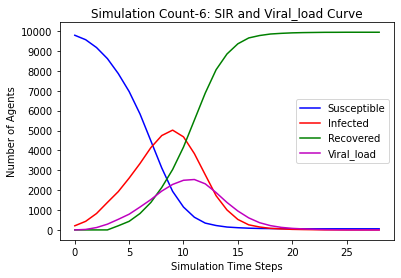

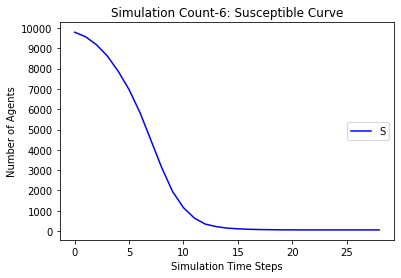

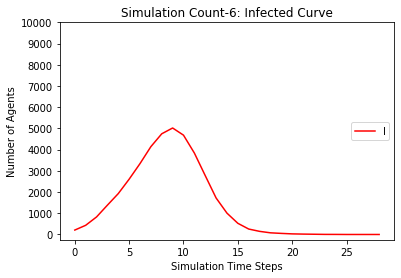

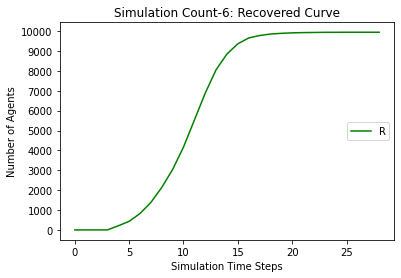

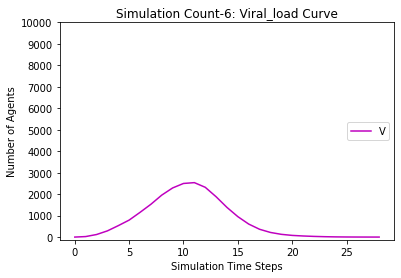

[9792, 9597, 9227, 8658, 7871, 6922, 5754, 4506, 3230, 2042, 1199, 678, 386, 222, 141, 96, 77, 61, 54, 52, 45, 40, 38, 37, 36, 36, 35, 34, 33, 33, 33, 33, 33, 33]
[208, 403, 773, 1342, 1921, 2675, 3473, 4152, 4641, 4880, 4555, 3828, 2844, 1820, 1058, 582, 309, 161, 87, 44, 32, 21, 16, 15, 9, 4, 3, 3, 3, 3, 2, 1, 0, 0]
[0, 0, 0, 0, 208, 403, 773, 1342, 2129, 3078, 4246, 5494, 6770, 7958, 8801, 9322, 9614, 9778, 9859, 9904, 9923, 9939, 9946, 9948, 9955, 9960, 9962, 9963, 9964, 9964, 9965, 9966, 9967, 9967]
[0.0, 25.0, 112.5, 261.25, 530.625, 780.3125, 1136.15625, 1588.078125, 1930.0390625, 2229.01953125, 2398.509765625, 2390.2548828125, 2211.12744140625, 1870.563720703125, 1432.2818603515625, 974.1409301757812, 622.0704650878906, 391.0352325439453, 243.51761627197266, 150.75880813598633, 89.37940406799316, 53.68970203399658, 33.84485101699829, 24.922425508499146, 18.461212754249573, 12.230606377124786, 7.115303188562393, 4.557651594281197, 2.2788257971405983, 1.1394128985702991, 0.569706

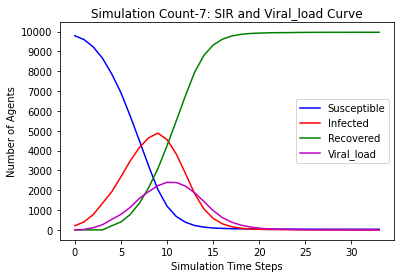

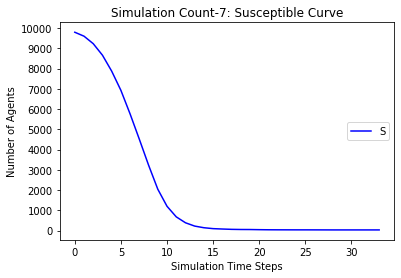

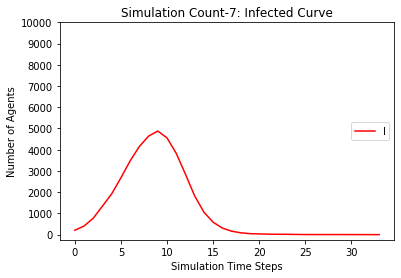

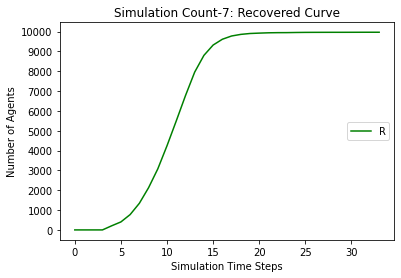

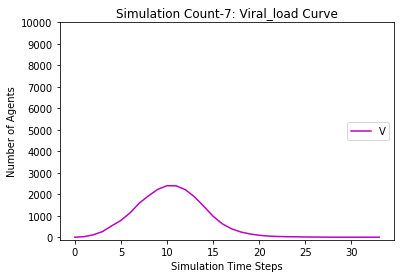

[9792, 9547, 9161, 8585, 7710, 6679, 5387, 3969, 2659, 1609, 936, 536, 309, 184, 121, 91, 70, 62, 55, 51, 48, 44, 41, 40, 40, 40, 40, 40, 40, 40]
[208, 453, 839, 1415, 2082, 2868, 3774, 4616, 5051, 5070, 4451, 3433, 2350, 1425, 815, 445, 239, 122, 66, 40, 22, 18, 14, 11, 8, 4, 1, 0, 0, 0]
[0, 0, 0, 0, 208, 453, 839, 1415, 2290, 3321, 4613, 6031, 7341, 8391, 9064, 9464, 9691, 9816, 9879, 9909, 9930, 9938, 9945, 9949, 9952, 9956, 9959, 9960, 9960, 9960]
[0.0, 31.0, 117.5, 316.75, 615.375, 902.6875, 1250.34375, 1717.171875, 2179.5859375, 2412.79296875, 2584.396484375, 2538.1982421875, 2170.09912109375, 1693.049560546875, 1206.5247802734375, 805.2623901367188, 521.6311950683594, 324.8155975341797, 190.40779876708984, 118.20389938354492, 71.10194969177246, 42.55097484588623, 26.275487422943115, 17.137743711471558, 9.568871855735779, 6.784435927867889, 4.392217963933945, 2.1961089819669724, 1.0980544909834862, 0.5490272454917431]
[[], [9792, 9569, 9190, 8580, 7801, 6789, 5547, 4248, 2903, 17

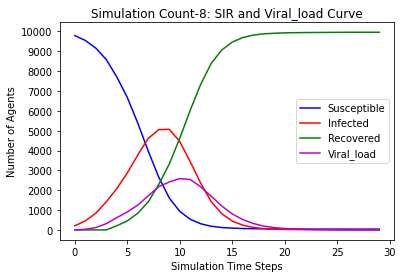

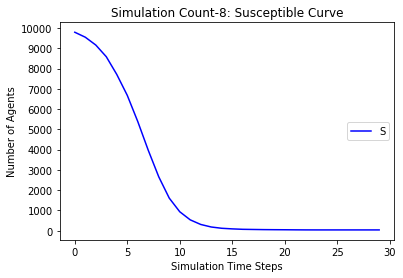

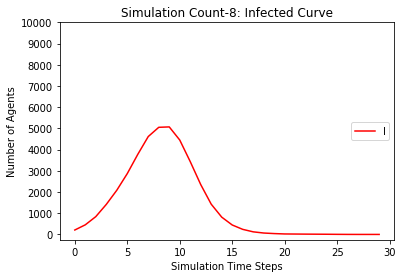

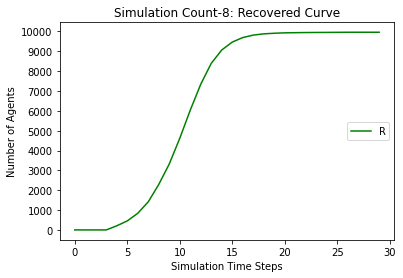

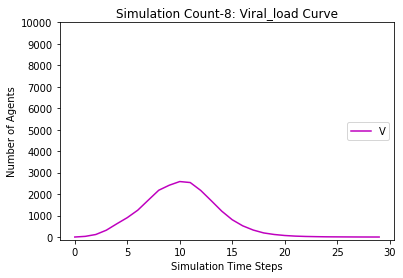

[9792, 9578, 9186, 8583, 7773, 6865, 5764, 4399, 3059, 1920, 1098, 628, 354, 197, 131, 91, 65, 47, 39, 37, 37, 37, 37, 37, 37, 37, 37, 37]
[208, 422, 814, 1417, 2019, 2713, 3422, 4184, 4714, 4945, 4666, 3771, 2705, 1723, 967, 537, 289, 150, 92, 54, 28, 10, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 208, 422, 814, 1417, 2227, 3135, 4236, 5601, 6941, 8080, 8902, 9372, 9646, 9803, 9869, 9909, 9935, 9953, 9961, 9963, 9963, 9963, 9963, 9963]
[0.0, 28.0, 127.0, 282.5, 496.25, 822.125, 1171.0625, 1612.53125, 2000.265625, 2372.1328125, 2507.06640625, 2494.533203125, 2216.2666015625, 1804.13330078125, 1366.066650390625, 947.0333251953125, 628.5166625976562, 403.2583312988281, 247.62916564941406, 150.81458282470703, 85.40729141235352, 49.70364570617676, 27.85182285308838, 14.92591142654419, 7.462955713272095, 3.7314778566360474, 1.8657389283180237, 0.9328694641590118]
[[], [9792, 9569, 9190, 8580, 7801, 6789, 5547, 4248, 2903, 1786, 992, 527, 286, 167, 101, 62, 44, 38, 36, 34, 32, 32, 32, 32, 32, 32, 32, 32

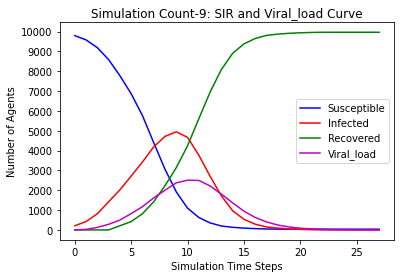

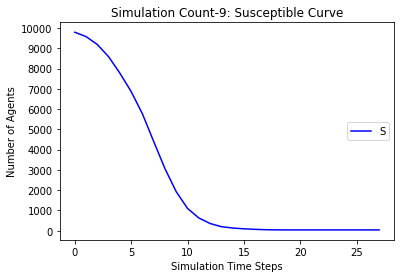

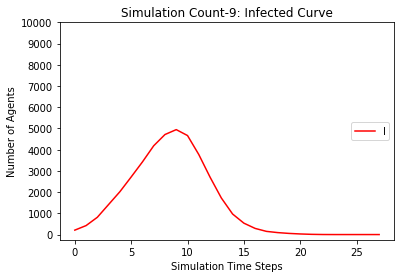

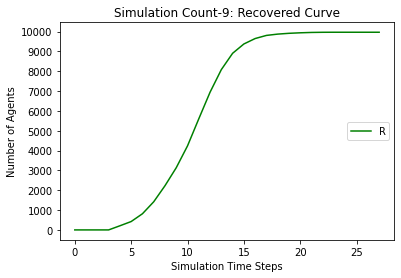

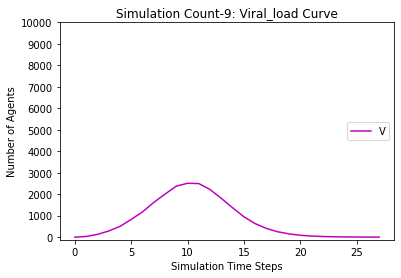

[9792, 9544, 9134, 8527, 7724, 6758, 5570, 4227, 2942, 1881, 1102, 615, 340, 186, 123, 84, 59, 46, 42, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39]
[208, 456, 866, 1473, 2068, 2786, 3564, 4300, 4782, 4877, 4468, 3612, 2602, 1695, 979, 531, 281, 140, 81, 44, 19, 7, 3, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 208, 456, 866, 1473, 2276, 3242, 4430, 5773, 7058, 8119, 8898, 9385, 9660, 9814, 9877, 9916, 9941, 9954, 9958, 9960, 9960, 9961, 9961, 9961, 9961]
[0.0, 26.0, 122.0, 283.0, 562.5, 854.25, 1191.125, 1623.5625, 2073.78125, 2335.890625, 2500.9453125, 2464.47265625, 2184.236328125, 1736.1181640625, 1306.05908203125, 898.029541015625, 576.0147705078125, 359.00738525390625, 216.50369262695312, 129.25184631347656, 76.62592315673828, 45.31296157836914, 26.65648078918457, 15.328240394592285, 8.664120197296143, 4.332060098648071, 2.1660300493240356, 1.0830150246620178, 0.5415075123310089]
[[], [9792, 9569, 9190, 8580, 7801, 6789, 5547, 4248, 2903, 1786, 992, 527, 286, 167, 101, 62, 44, 38, 36, 34, 32, 32, 3

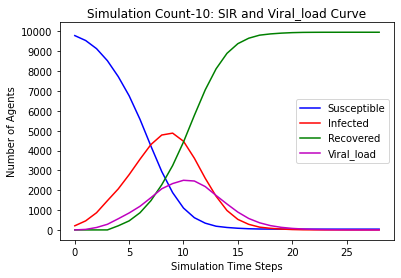

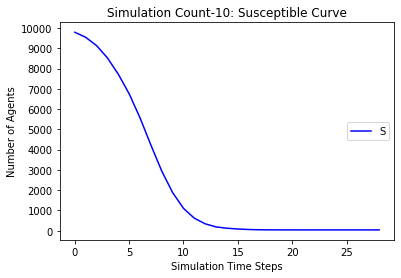

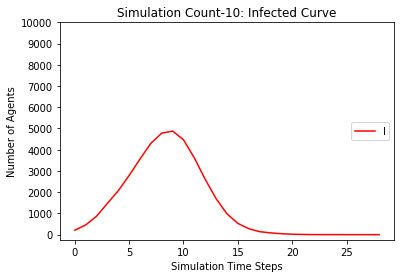

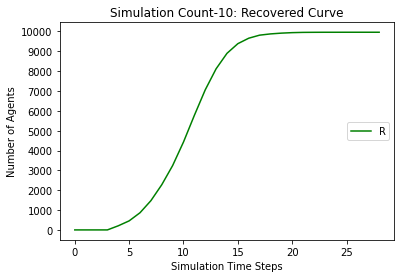

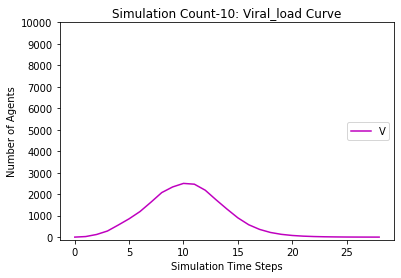

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,ISOLATED_Sj,ISOLATED_Ij,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj >= 1 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,ISOLATED_Sj,ISOLATED_Ij,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

Susceptible Average (100 Simulations): [9792, 9570.12890625, 9179.90234375, 8589.3203125, 7768.2109375, 6815.1953125, 5645.68359375, 4281.80078125, 2957.8984375, 1838.0703125, 1060.65625, 602.87109375, 340.28515625, 195.83984375, 128.76953125, 91.4453125, 67.94921875, 53.765625, 46.375, 43.51953125, 41.734375, 39.84375, 38.84375, 38.453125, 38.328125, 38.296875, 38.140625, 38.015625]
Infected Average(100 Simulations): [208, 429.87109375, 820.09765625, 1410.6796875, 2023.7890625, 2754.93359375, 3534.21875, 4307.51953125, 4810.3125, 4977.125, 4585.02734375, 3678.9296875, 2617.61328125, 1642.23046875, 931.88671875, 511.42578125, 272.3359375, 142.07421875, 82.39453125, 47.92578125, 26.21484375, 13.921875, 7.53125, 5.06640625, 3.40625, 1.546875, 0.703125, 0.4375]
Recovered Average(100 Simulations): [0, 0, 0, 0, 208, 429.87109375, 820.09765625, 1410.6796875, 2231.7890625, 3184.8046875, 4354.31640625, 5718.19921875, 7042.1015625, 8161.9296875, 8939.34375, 9397.12890625, 9659.71484375, 9804.16

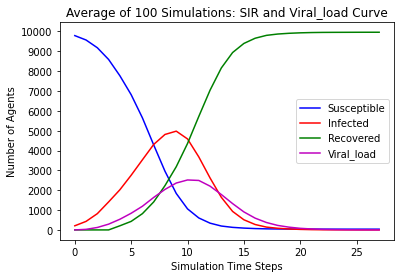

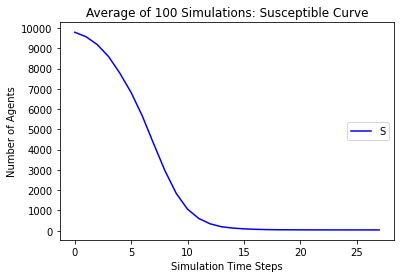

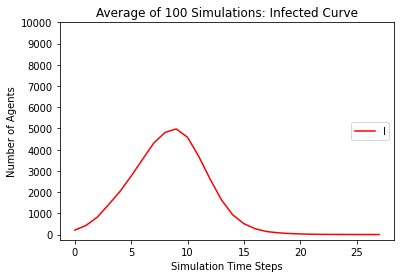

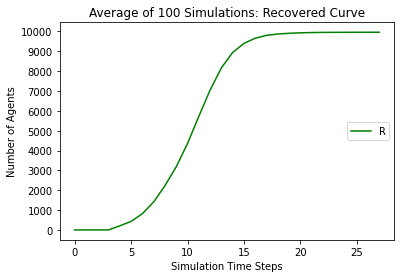

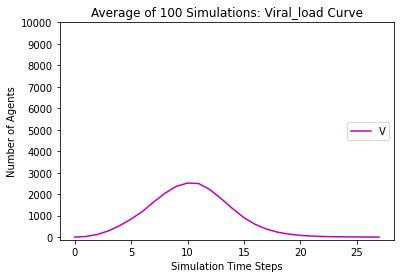

In [11]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

print("Susceptible Average (100 Simulations):", SC)
print("Infected Average(100 Simulations):", IC)
print("Recovered Average(100 Simulations):", RC)
print("Viral_load Average(100 Simulations):", VT) 
print("Time Steps:", TC) 



plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
